In [12]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.spatial import distance
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

warnings.filterwarnings("ignore", category=UserWarning)

# config
AUDIO_FOLDER = r"C:\Users\sudha\Documents\Education\Study Docs\Amrita\SEM 5\ML\LAB\ML Lab\Cleaned_Audios\Cleaned_Audios"
n_mfcc = 13

def extract_mfcc(filepath, n_mfcc=13):
    try:
        y, sr = librosa.load(filepath, sr=None)
        if len(y) < sr // 2 or np.max(np.abs(y)) < 0.01:
            raise ValueError("Audio too short or silent")
        y = y / np.max(np.abs(y))  # Normalize
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return np.mean(mfcc, axis=1)
    except Exception as e:
        print(f"Error processing {os.path.basename(filepath)}: {e}")
        return None

class_features = defaultdict(list)
all_mfcc0 = []

for fname in os.listdir(AUDIO_FOLDER):
    if fname.endswith(".mp3"):
        try:
            class_label = fname.split("_s")[1].replace(".mp3", "")
        except:
            continue
        fpath = os.path.join(AUDIO_FOLDER, fname)
        mfcc_vec = extract_mfcc(fpath)
        if mfcc_vec is not None:
            class_features[class_label].append(mfcc_vec)
            all_mfcc0.append(mfcc_vec[0])


C:\Users\sudha\PyCharmMiscProject\.venv\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing 102_s10.mp3: 
Error processing 102_s11.mp3: 
Error processing 102_s12.mp3: 
Error processing 102_s13.mp3: 
Error processing 102_s14.mp3: 
Error processing 102_s15.mp3: 
Error processing 102_s16.mp3: 
Error processing 102_s17.mp3: 
Error processing 102_s18.mp3: 
Error processing 102_s19.mp3: 
Error processing 102_s20.mp3: 
Error processing 102_s8.mp3: 
Error processing 102_s9.mp3: 
Error processing 105_s19.mp3: 
Error processing 105_s20.mp3: 
Error processing 105_s21.mp3: 
Error processing 105_s22.mp3: 
Error processing 105_s23.mp3: 
Error processing 105_s24.mp3: 
Error processing 106_s12.mp3: 
Error processing 106_s13.mp3: 
Error processing 106_s14.mp3: 
Error processing 106_s15.mp3: 
Error processing 106_s16.mp3: 
Error processing 106_s17.mp3: 
Error processing 106_s18.mp3: 
Error processing 106_s19.mp3: 
Error processing 106_s20.mp3: 
Error processing 107_s10.mp3: 
Error processing 107_s11.mp3: 
Error processing 107_s12.mp3: 
Error processing 107_s13.mp3: 
Error proc

## Q1)

In [13]:
def analyze_class_stats(class_features):
    classes = list(class_features.keys())
    if len(classes) < 2:
        print("Need at least 2 classes.")
        return

    class1, class2 = classes[:2]
    data1 = np.array(class_features[class1])
    data2 = np.array(class_features[class2])

    centroid1 = np.mean(data1, axis=0)
    centroid2 = np.mean(data2, axis=0)

    std1 = np.std(data1, axis=0)
    std2 = np.std(data2, axis=0)

    interclass_distance = np.linalg.norm(centroid1 - centroid2)

    print(f"\n--- A1 Analysis: Comparing Class {class1} and {class2} ---")
    print(f"Centroid 1: {centroid1}")
    print(f"Centroid 2: {centroid2}")
    print(f"Spread (std) for class {class1}: {std1}")
    print(f"Spread (std) for class {class2}: {std2}")
    print(f"Euclidean distance between centroids: {interclass_distance:.4f}")



## Q2)

In [14]:
def plot_mfcc0_histogram(all_mfcc0):
    all_mfcc0 = np.array(all_mfcc0)

    if len(all_mfcc0) == 0:
        print("No valid audio files with usable MFCC[0].")
        return

    hist, bin_edges = np.histogram(all_mfcc0, bins=20)
    mean_val = np.mean(all_mfcc0)
    var_val = np.var(all_mfcc0)

    plt.figure(figsize=(8, 5))
    plt.hist(all_mfcc0, bins=20, color='lightcoral', edgecolor='black')
    plt.title("Histogram of MFCC[0] (Energy Feature)")
    plt.xlabel("MFCC[0] Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nMean of MFCC[0]: {mean_val:.2f}")
    print(f"Variance of MFCC[0]: {var_val:.2f}")



## Q3)

In [15]:
def plot_minkowski_distance(class_features):
    all_vectors = [vec for vecs in class_features.values() for vec in vecs]
    if len(all_vectors) < 2:
        print("Not enough vectors.")
        return

    vec1 = all_vectors[0]
    vec2 = all_vectors[1]

    r_values = list(range(1, 11))
    distances = [distance.minkowski(vec1, vec2, p=r) for r in r_values]

    plt.figure(figsize=(8, 5))
    plt.plot(r_values, distances, marker='o', color='green')
    plt.title("Minkowski Distance between Two MFCC Vectors")
    plt.xlabel("r (Minkowski order)")
    plt.ylabel("Distance")
    plt.xticks(r_values)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nMinkowski distances:")
    for r, d in zip(r_values, distances):
        print(f"r = {r}: Distance = {d:.4f}")


## Q4)

In [16]:
def perform_train_test_split(class_features, class1='10', class2='19', test_ratio=0.3):
    if class1 not in class_features or class2 not in class_features:
        print(f"Classes {class1} and/or {class2} not found in the dataset.")
        return None, None, None, None

    X = np.array(class_features[class1] + class_features[class2])
    y = np.array([0] * len(class_features[class1]) + [1] * len(class_features[class2]))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)

    print(f"Total samples: {len(X)}")
    print(f"Train samples: {len(X_train)} | Test samples: {len(X_test)}")
    return X_train, X_test, y_train, y_test

## Q5)

In [17]:
def train_knn_classifier(X_train, y_train, k=3):
    if X_train is None or y_train is None:
        print("Training data is missing.")
        return None

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"k-NN classifier trained with k={k}")
    return knn

## Q6)

In [18]:
def evaluate_knn_accuracy(model, X_test, y_test):
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy on test set: {accuracy * 100:.2f}%")
    return accuracy


## Q7)

In [19]:

#--A7--
def predict_test_samples(model, X_test):
    predictions = model.predict(X_test)
    print("Predicted labels for test samples:", predictions)
    return predictions

## Q8)

In [20]:

#--A8--
def accuracy_vs_k_plot(X_train, X_test, y_train, y_test):
    k_values = range(1, 12)
    accuracies = []

    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        accuracies.append(acc)

    plt.figure(figsize=(8, 5))
    plt.plot(k_values, accuracies, marker='o', linestyle='--', color='teal')
    plt.title("Accuracy vs k (Number of Neighbors)")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return accuracies

## Q9)

In [21]:
def evaluate_confusion_metrics(model, X, y, label=""):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    print(f"\nConfusion Matrix ({label} set):\n{cm}")
    print(f"\nClassification Report ({label} set):\n{classification_report(y, y_pred)}")


--- A1 Analysis: Comparing Class 1 and 10 ---
Centroid 1: [-259.13495    161.55264     15.184353    20.162136   -13.719041
   12.0295     -15.69566    -12.660883    -6.920454    -3.1101747
  -10.057013    -2.5673292   -7.506902 ]
Centroid 2: [-274.3221     159.99503     17.838211    15.709738   -10.854157
    5.2915936  -14.297809   -13.599215    -7.9385467   -4.70076
   -9.985747    -3.6677217   -7.1738844]
Spread (std) for class 1: [46.673878  13.307991  13.349242   9.362619   9.78216    8.436214
  7.094202   6.839151   6.154629   4.281485   3.8051827  3.5331244
  3.493784 ]
Spread (std) for class 10: [40.43579   18.10351   13.910612   8.977848   9.904343   9.16611
  7.834411   6.125783   5.883142   4.417992   4.3105288  3.2147496
  3.464197 ]
Euclidean distance between centroids: 17.9242


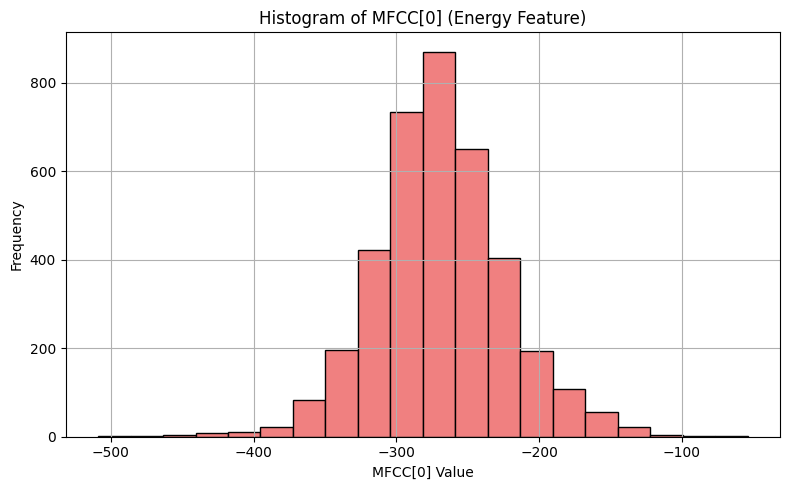


Mean of MFCC[0]: -269.01
Variance of MFCC[0]: 2095.06


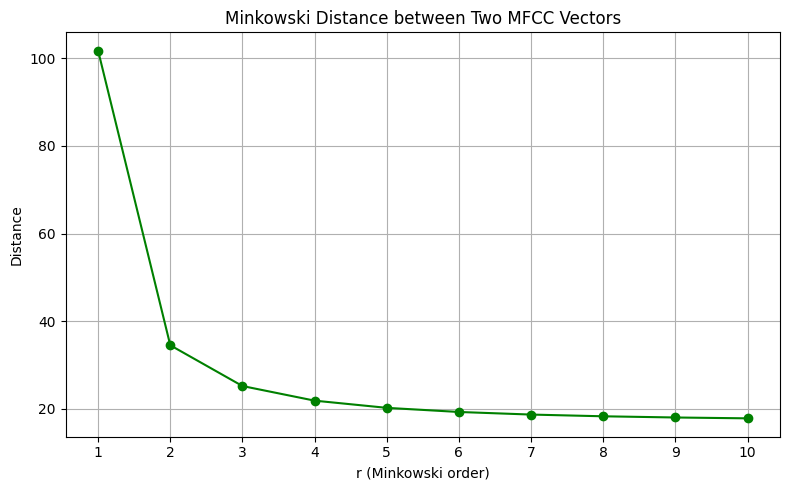


Minkowski distances:
r = 1: Distance = 101.6864
r = 2: Distance = 34.5210
r = 3: Distance = 25.2283
r = 4: Distance = 21.8939
r = 5: Distance = 20.2537
r = 6: Distance = 19.3123
r = 7: Distance = 18.7212
r = 8: Distance = 18.3278
r = 9: Distance = 18.0551
r = 10: Distance = 17.8604
Total samples: 254
Train samples: 177 | Test samples: 77
k-NN classifier trained with k=3
KNeighborsClassifier(n_neighbors=3)
Accuracy on test set: 46.75%
Predicted labels for test samples: [0 1 0 0 0]


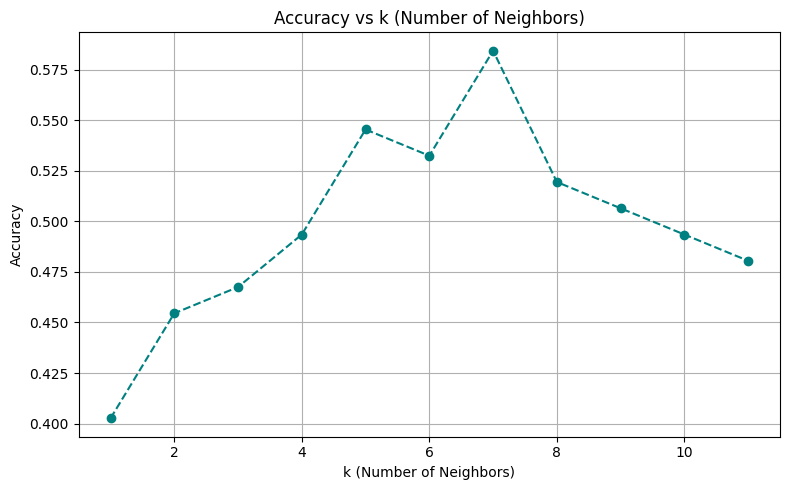


Confusion Matrix (Train set):
[[86 12]
 [23 56]]

Classification Report (Train set):
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        98
           1       0.82      0.71      0.76        79

    accuracy                           0.80       177
   macro avg       0.81      0.79      0.80       177
weighted avg       0.80      0.80      0.80       177


Confusion Matrix (Test set):
[[21 19]
 [22 15]]

Classification Report (Test set):
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        40
           1       0.44      0.41      0.42        37

    accuracy                           0.47        77
   macro avg       0.46      0.47      0.46        77
weighted avg       0.47      0.47      0.47        77



In [22]:
# MAIN
if len(class_features) >= 2:
    analyze_class_stats(class_features)         # A1
    plot_mfcc0_histogram(all_mfcc0)            # MFCC[0] Histogram
    plot_minkowski_distance(class_features) # Minkowski Plot
    X_train, X_test, y_train, y_test = perform_train_test_split(class_features, class1='10', class2='19')
    knn_model = train_knn_classifier(X_train, y_train, k=3)
    print(knn_model)
    evaluate_knn_accuracy(knn_model, X_test, y_test)
    predict_test_samples(knn_model, X_test[:5])  # First 5 samples
    accuracy_vs_k_plot(X_train, X_test, y_train, y_test)
    evaluate_confusion_metrics(knn_model, X_train, y_train, label="Train")
    evaluate_confusion_metrics(knn_model, X_test, y_test, label="Test")

else:
    print("Not enough valid classes with extracted features.")
